In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
topix_data = pd.read_csv("./topix/topix2000-2018.csv", encoding="shift-jis",index_col='Date')

In [3]:
topix_data.index = pd.to_datetime(topix_data.index)

In [4]:
topix_data.index = topix_data.index.tz_localize('Asia/Tokyo')

In [5]:
topix_data.index = topix_data.index + pd.Timedelta('0 days 8:00:00')

In [6]:
usdjpy_data = pd.read_csv("USDJPY2.csv", encoding="UTF-8",index_col="日付")

In [7]:
usdjpy_data.index = pd.to_datetime(usdjpy_data.index)

In [8]:
usdjpy_data.index=usdjpy_data.index.tz_localize('US/Eastern')

In [9]:
usdjpy_data.index = usdjpy_data.index + pd.Timedelta('0 days 16:00:00')

In [10]:
usdjpy_data.index =usdjpy_data.index.tz_convert('Asia/Tokyo')

In [11]:
topix_data.index = topix_data.index.strftime("%Y/%m/%d")

In [12]:
usdjpy_data.index = usdjpy_data.index.strftime("%Y/%m/%d")

In [13]:
merge = pd.merge(topix_data,usdjpy_data,left_index=True,right_index=True)

In [14]:
merge.index = pd.to_datetime(merge.index)

In [15]:
merge.head()

,Open,High,Low,Close,終値,始値,高値,安値,前比%
2000-01-04,1726.21,1744.16,1710.34,1717.47,101.59,102.11,102.18,101.31,-0.66%
2000-01-05,1709.57,1709.57,1612.91,1651.84,103.27,101.46,103.28,101.40,1.65%
2000-01-06,1654.14,1657.77,1609.30,1609.59,104.29,103.28,104.40,102.76,0.99%
2000-01-07,1607.33,1609.22,1585.80,1599.01,105.33,104.32,105.55,103.97,1.00%
2000-01-11,1607.12,1679.71,1607.12,1678.82,105.11,105.12,105.39,104.30,-0.24%


In [16]:
merge=merge[['Open','終値']]

In [17]:
merge.columns = ['TOPIX', 'EXCH']

In [18]:
merge.head()

,TOPIX,EXCH
2000-01-04,1726.21,101.59
2000-01-05,1709.57,103.27
2000-01-06,1654.14,104.29
2000-01-07,1607.33,105.33
2000-01-11,1607.12,105.11


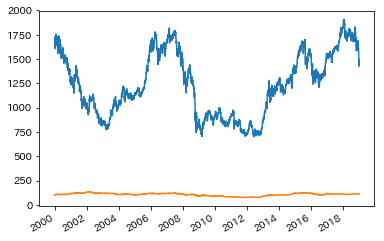

In [21]:
merge['TOPIX'].plot()
merge['EXCH'].plot()

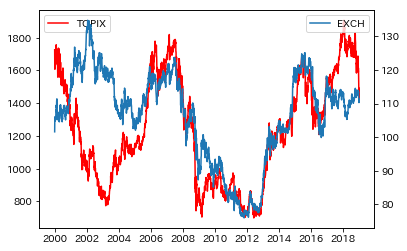

In [31]:
fig, ax1 = plt.subplots()
ax1.plot(merge['TOPIX'],color='red',linestyle='solid')
ax2 = ax1.twinx()
ax2.plot(merge['EXCH'],linestyle='solid')
ax1.legend()
ax2.legend()